<a href="https://colab.research.google.com/github/acastellanos-ie/NLP-MBD-EN-PT/blob/main/tagging_parsing_practice/parsing_practice_proposal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Configuration

**Execute this steps to configure the Google Colab environment in order to execute this notebook. It is not required if you are executing it locally and you have properly configured your local environment according to what explained in the Github Repository.**

In [16]:
# @title Colab Setup

repository_name = "NLP-MBD-EN-PT"
repository_url = 'https://github.com/nerealegui/' + repository_name

#print("### Cloning the Repository ###")
#! git clone $repository_url
#print()

Everything is set up properly! You can now move on to the practice code.

I do recommend you to restart the environment at this point to ensure that Google Colab is aware of the installed packages and their configuration (see image below).

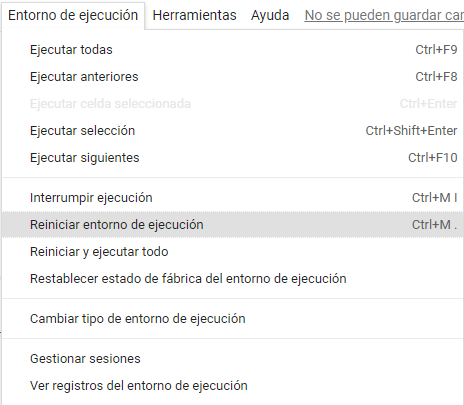

# Parsing Practice

The purpose of this practical session is to gain more insight into using parsers and grammars and to get familiarized with the tools provided to this end by NLTK.

**Our goals are to:**

- Understand the process of parsing better by doing some examples by hand.
- Gain insight into grammars by writing a grammar of our own.
- Experiment with training a grammar from a corpus and evaluating it.

**The practical session is organized in four sections:**

- The warm-up, where you are going to use a given toy grammar to generate parse trees and get a chance to compare your intuition with the results provided by the NLTK parsers.
- Then, you will need to design and test your own grammar, again, for a small example.
- Next, you will automatically extract a grammar from a corpus of annotated sentences.
- Finally, you are going to explore ways to improve automatically extracted grammars, through error analysis.

Before diving in, it would be useful to have a look at how NLTK handles parsing. At the end of the Notebook, you will find a summary of the most useful commands. For more helpful explanations and examples, feel free to consult the [Chapter 8 of the NLTK Book](https://www.nltk.org/book/ch08.html), along with the chapter extras.


# Exercise 0

Have a look at the texts and at the grammar below.

### Input texts:

    I saw an elephant
    I saw an elephant in my pajamas

### Grammar:                

    S   -> NP VP     [1.0]
    PP  -> P NP      [1.0]
    NP  -> Det N     [0.4]
    NP  -> Det N PP  [0.2]
    VP  -> V NP      [0.5]
    VP  -> VP PP     [0.5]

    NP  -> 'I'        [0.4]
    Det -> 'an'       [0.5]
    Det -> 'my'       [0.5]
    N   -> 'elephant' [0.5]
    N   -> 'pajamas'  [0.5]
    V   -> 'saw'      [1.0]
    P   -> 'in'       [1.0]



1.- Load the previous grammar by means of the `fromstring` method of the `PCFG` class.

2.- Using this grammar, try to parse the sample sentences with the NLTK `ChartParser` and then with the  NLTK `Viterbi` parser. This parsers covers the two methodologies that we explained in class. The `ChartParser` does not care about probabilities; it just try to find all the possible parses (trees) that fit the sentence. In contrast, Viterbi is a Dynamic Programming algorithm (very similar to the CKY algorithm that we explained in class) that tries to recursively find the best parse (tree) for the sentence, based on the probabilities defined by the grammar.

3.- Examine the output of the parsers. Is there any difference?

4.- Using the NLTK GUI, draw the most probable parse trees found by the NLTK parsers and compare them.

How are they different?
Do they differ only in the names of the nonterminals use, or is a structural difference as well?
Why do you think these differences occur?



# Solution 0

In [17]:
import nltk
nltk.download("punkt_tab")
from nltk.tree import *
from nltk.draw import tree

# Grammar creation/loading
grammar = nltk.PCFG.fromstring("""
S -> NP VP 	[1.0]
PP -> P NP 	[1.0]
NP -> Det N 	[0.4]
NP -> Det N PP 	[0.2]
NP -> 'I' 	[0.4]
VP -> V NP 	[0.5]
VP -> VP PP 	[0.5]
Det -> 'an' 	[0.5]
Det -> 'my' 	[0.5]
N -> 'elephant' [0.5]
N ->  'pajamas' [0.5]
V -> 'saw' 	[1.0]
P -> 'in' 	[1.0]
""")

# Import example sentences to NLTK and tokenize them
str_sentence1 = "I saw an elephant"
str_sentence2 = "I saw an elephant in my pajamas"

print("Example sentences")
print(str_sentence1)
print(str_sentence2)

# Tokenize the sentences
tokens1 = nltk.word_tokenize(str_sentence1)
tokens2 = nltk.word_tokenize(str_sentence2)

# Create the Chart and Viterbi parsers, with the input grammar
chart_parser = nltk.ChartParser(grammar)
viterbi_parser = nltk.ViterbiParser(grammar)

# Results for the Chart Parser
print("Parse trees obtained with the Chart parser")
print("Sentence:", str_sentence1)
for tree in chart_parser.parse(tokens1):
    print(tree)
print()

print("Sentence:", str_sentence2)
for tree in chart_parser.parse(tokens2):
    print(tree)
print("**" * 30)

# Results for the Viterbi Parser
print("Parse trees obtained with the Viterbi parser")
print("Sentence 1")
for tree in viterbi_parser.parse(tokens1):
    print(tree)
print()

print("Sentence 2")
for tree in viterbi_parser.parse(tokens2):
    print(tree)


Example sentences
I saw an elephant
I saw an elephant in my pajamas
Parse trees obtained with the Chart parser
Sentence: I saw an elephant
(S (NP I) (VP (V saw) (NP (Det an) (N elephant))))

Sentence: I saw an elephant in my pajamas
(S
  (NP I)
  (VP
    (VP (V saw) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V saw)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))
************************************************************
Parse trees obtained with the Viterbi parser
Sentence 1
(S (NP I) (VP (V saw) (NP (Det an) (N elephant)))) (p=0.02)

Sentence 2
(S
  (NP I)
  (VP
    (V saw)
    (NP
      (Det an)
      (N elephant)
      (PP (P in) (NP (Det my) (N pajamas)))))) (p=0.001)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/nerealegui/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


We can notice that for the first sentence, the two the parsers agree on the result. This is due to the more simple structure of the sentence.

For the second sentence, the `ChartParser` finds two parse trees, while the `Viterbi` parser outputs only one result. This occurs because the `Viterbi` parser only computes the most probable parse of the sentences, while the `ChartParser` is not concerned with the probabilities and it searches for all parse possibilities. In this case, we can notice that the most probable parse for the second sentence is the second parse produced by the Chart parser.


# Exercise 1

You are given  the following sentences:

    Alice wondered with Bob in the empty city streets
    Bob offered Alice an iguana for her birthday
    Alice gave an inspiring speech at the conference on education


**1. Design a non-probabilistic context-free grammar for parsing these sentences and then manually provide the parse tree(s) for these sentences. Here is a list of lexical rules and syntactic categories that you could use to devise the grammar:**
    
        Lexical rules:

        V    -> 'wondered' | 'offered' | 'gave'
        NP   -> 'Alice' | 'Bob'
        N    -> 'city' | 'streets' | 'iguana' | 'birthday' | 'speech' | 'conference' | 'education'
        Adj  -> 'empty' | 'inspiring'
        Det  -> 'the' | 'an' | 'her'
        Prep -> 'with' | 'in' | 'for' | 'at' | 'on'
        Suggested syntactic categories (non-terminals):

        S - Sentence
        NP - Noun Phrase
        VP - Verb Phrase
        PNP - Prepositional Noun Phrase

In [18]:
grammar = nltk.CFG.fromstring("""
    S -> NP VP
    VP -> V PNP
    VP -> V NP
    VP -> V NP PNP
    VP -> V NP NP
    PNP -> Prep NP
    NP -> Det N
    NP -> Det Adj N
    NP -> N
    NP -> NP PNP
    NP -> 'Alice' | 'Bob'
    V -> 'wondered' | 'offered' | 'gave'
    N -> 'city' | 'streets' | 'iguana' | 'birthday' | 'speech' | 'conference' | 'education'
    Adj -> 'empty' | 'inspiring'
    Det -> 'the' | 'an' | 'her'
    Prep -> 'with' | 'in' | 'for' | 'at' | 'on'
""")

**2. With the grammar you designed in point (1.), parse the above sentences using NLTK’s Chart parser, described in Section 1.**


In [19]:
str_sentence1 = "Alice wondered with Bob in the empty city streets"
str_sentence2 = "Bob offered Alice an iguana for her birthday"
str_sentence3 = "Alice gave an inspiring speech at the conference on education"

# Sentence parsing
tokens1 = nltk.word_tokenize(str_sentence1)
tokens2 = nltk.word_tokenize(str_sentence2)
tokens3 = nltk.word_tokenize(str_sentence3)

print("Example sentences")
print(tokens1)
print(tokens2)
print(tokens3)

chart_parser = nltk.ChartParser(grammar)

parse_tree1 = chart_parser.parse(tokens1)
parse_tree2 = chart_parser.parse(tokens2)
parse_tree3 = chart_parser.parse(tokens3)



Example sentences
['Alice', 'wondered', 'with', 'Bob', 'in', 'the', 'empty', 'city', 'streets']
['Bob', 'offered', 'Alice', 'an', 'iguana', 'for', 'her', 'birthday']
['Alice', 'gave', 'an', 'inspiring', 'speech', 'at', 'the', 'conference', 'on', 'education']


**3. Display and compare the parse trees obtained in points (1.) and (2.).**

In [20]:
chart_parser = nltk.ChartParser(grammar)

# User the chart parser object to print the trees
print("Parse trees obtained with the Chart parser")
print("Sentence 1")
for tree in parse_tree1:
    print(tree)
print()
print("Sentence 2")
for tree in parse_tree2:
    print(tree)
print()
print("Sentence 3")
for tree in parse_tree3:
    print(tree)
print("**" * 30)


Parse trees obtained with the Chart parser
Sentence 1

Sentence 2
(S
  (NP Bob)
  (VP
    (V offered)
    (NP Alice)
    (NP
      (NP (Det an) (N iguana))
      (PNP (Prep for) (NP (Det her) (N birthday))))))

Sentence 3
(S
  (NP Alice)
  (VP
    (V gave)
    (NP
      (NP (Det an) (Adj inspiring) (N speech))
      (PNP (Prep at) (NP (Det the) (N conference))))
    (PNP (Prep on) (NP (N education)))))
(S
  (NP Alice)
  (VP
    (V gave)
    (NP (Det an) (Adj inspiring) (N speech))
    (PNP
      (Prep at)
      (NP
        (NP (Det the) (N conference))
        (PNP (Prep on) (NP (N education)))))))
(S
  (NP Alice)
  (VP
    (V gave)
    (NP
      (NP
        (NP (Det an) (Adj inspiring) (N speech))
        (PNP (Prep at) (NP (Det the) (N conference))))
      (PNP (Prep on) (NP (N education))))))
(S
  (NP Alice)
  (VP
    (V gave)
    (NP
      (NP (Det an) (Adj inspiring) (N speech))
      (PNP
        (Prep at)
        (NP
          (NP (Det the) (N conference))
          (PNP (Prep o

# Exercise 2: Extracting a Grammar from a Corpus

We have designed very simple grammars in the previous exercises. Even for these very small examples, designing grammars are time consuming and does not necessarily have the best results.

In this exericse, we explore a different approach to creating grammars: **automatic extraction from annotated texts**.

We start from an annotated text: the `Treebank corpus` from the NLTK framework, which includes a small subset (5% fragment) of the `Penn Treebank Corpus`. It contains data from `Wall Street Journal` for 1650 sentences:

    ( (S
        (NP-SBJ
          (NP (NNP Pierre) (NNP Vinken) )
          (, ,)
          (ADJP
            (NP (CD 61) (NNS years) )
            (JJ old) )
          (, ,) )
        (VP (MD will)
          (VP (VB join)
            (NP (DT the) (NN board) )
            (PP-CLR (IN as)
              (NP (DT a) (JJ nonexecutive) (NN director) ))
            (NP-TMP (NNP Nov.) (CD 29) )))
        (. .) ))
        
     
The goal is to automatically extract the CFG out of the treebank and then to evaluate and improve the extracted grammar.

**1. First, split the corpus into two parts : one for learning the grammar (training set) and one for evaluating it (test set). For the sake of saving time during this practical session, use 3% of the total number of sentences for the test set. Here is how you could make the split.**

```python
        dataset_size = len(treebank.parsed_sents())

        ## here, we define the split percentage for the training set and the
        ## learning set, in our case ~3% and ~97%

        split_size = int(dataset_size * 0.97)
        learning_set = treebank.parsed_sents()[:split_size]
        test_set = treebank.parsed_sents()[split_size:]
```

Note that `test_set`  already contains the parses of the sentences. This is what we are going to compare against, in order to assess the quality of the extracted grammar. In addition, we need the raw (not parsed)  format of the sentences in the test set. These raw sentences will be parsed with the extracted grammar and then compared against the reference, stored in test_set.

```python
        # create a set containing the raw sentences
        sents = treebank.sents()
        raw_test_set = [ [ w for w in sents[i] ] for i in range(split_size, dataset_size) ]
```

**Extract the grammar out of the learning corpus** At this point, it might be useful to have another look at the commands provided in the end of the document. Here is a suggestion on how to do it. Note that we still need the entire lexicon (i.e. rules of the type POS -> word) even though the syntactic rules are extracted from only a portion of the treebank. Assume that you have already separated the learning set from the test set and that the learning set is stored in the  learning_set  variable.

```python
        # This is where we will store all of the productions necessary to
        # construct the PCFG.
        tbank_productions = []

        # For all of the (parsed) sentences in the learning set, extract the
        # productions (i.e. extract the rules).
        for sent in learning_set:
            for production in sent.productions():
                tbank_productions.append(production)

        # Now, we will add the lexical rules for the ENTIRE lexicon.
        for word, tag in treebank.tagged_words():

            # for each tagged word, we create a tree containing that
            # lexical rule, in order to be able to add it to our
            # production set tbank_productions.

            t = Tree.fromstring("("+ tag + " " + word  +")")
            for production in t.productions():
                tbank_productions.append(production)

        # At this point, we have the syntactic rules extracted from the
        # learning set and all of the lexical rules. We are ready to extract
        # the PCFG.
        tbank_grammar = nltk.grammar.induce_pcfg(Nonterminal('S'), tbank_productions)
```
        
Try to have a look at the grammar. How many rules are there? Imagine you would have to correct it, for instance. You certainly will come to the conclusion that this is not feasible. Indeed, in such a framework (automated extraction) the grammars should not  be modified by hand (maybe not even read), but only the corpus has to be changed/corrected/extended.

Before executing the code you need to install the pre-trained parsing models

In [21]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     /Users/nerealegui/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [22]:
# Define the Treebank corpus as treebank
from nltk.corpus import treebank
from nltk.grammar import Nonterminal
from nltk.tree import Tree

In [23]:
# Your code here

dataset_size = len(treebank.parsed_sents())

## here, we define the split percentage for the training set and the
## learning set, in our case ~3% and ~97%

split_size = int(dataset_size * 0.97)
learning_set = treebank.parsed_sents()[:split_size]
test_set = treebank.parsed_sents()[split_size:]

# create a set containing the raw sentences
sents = treebank.sents()
raw_test_set = [ [ w for w in sents[i] ] for i in range(split_size, dataset_size) ]

# This is where we will store all of the productions necessary to
# construct the PCFG.
tbank_productions = []

# For all of the (parsed) sentences in the learning set, extract the
# productions (i.e. extract the rules).
for sent in learning_set:
    for production in sent.productions():
        tbank_productions.append(production)

# Now, we will add the lexical rules for the ENTIRE lexicon.
for word, tag in treebank.tagged_words():
    # for each tagged word, we create a tree containing that
    # lexical rule, in order to be able to add it to our
    # production set tbank_productions.

    t = Tree.fromstring("("+ tag + " " + word  +")")
    for production in t.productions():
        tbank_productions.append(production)

# At this point, we have the syntactic rules extracted from the
# learning set and all of the lexical rules. We are ready to extract
# the PCFG.
tbank_grammar = nltk.grammar.induce_pcfg(Nonterminal('S'), tbank_productions)


```mermaid
sequenceDiagram
    participant User as User
    participant Treebank as Treebank
    participant LearningSet as Learning Set
    participant TestSet as Test Set
    participant Productions as Productions
    participant Grammar as PCFG Grammar

    User->>Treebank: Get parsed sentences
    Treebank-->>User: Return parsed sentences
    User->>Treebank: Get dataset size
    Treebank-->>User: Return dataset size
    User->>Treebank: Split dataset into learning and test sets
    Treebank-->>LearningSet: Learning set (~97%)
    Treebank-->>TestSet: Test set (~3%)
    User->>Treebank: Get raw sentences for test set
    Treebank-->>TestSet: Raw test sentences
    User->>LearningSet: Extract productions from parsed sentences
    LearningSet-->>Productions: Add syntactic rules
    User->>Treebank: Get tagged words
    Treebank-->>User: Return tagged words
    User->>Productions: Add lexical rules
    User->>Grammar: Induce PCFG from productions
    Productions-->>Grammar: Provide productions
    Grammar-->>User: Return PCFG grammar
```

**2. Evaluate the performance of the grammars on the test set (the 3% of the sentences from the treebank that you isolated in the beginning of the exercise). What proportion of sentences from the test set have been parsed as in the reference (i.e. are correctly parsed) by the extracted grammar?**

In [24]:
# From the created gramar, you create a parser to annotate new sentences
print("Initializing parser")
parser = nltk.ViterbiParser(tbank_grammar) # http://www.nltk.org/_modules/nltk/parse/viterbi.html


# Test the extracted grammar with the Viterbi parser on one sentence.
# The Viterbi parser gives the most probable parse tree
# Test all sentences in the test-set and compare them to the reference parsing
for i in range(0, len(raw_test_set)):
    print("==== Parsing sentence " + str(i))
    test_sent = raw_test_set[i]
    # This will raise an exception if the tokens in the test_sentence
    # are not covered by the grammar; should not happen.
    tbank_grammar.check_coverage(test_sent)
    print(test_sent)
    print("[" + str(i) + "] Reference parse:")
    print(test_set[i])
    print("[" + str(i) + "] Parse trees:")
    # Your code here: With parser.parse(test_sent)


Initializing parser
==== Parsing sentence 0
['Companies', 'listed', '*', 'below', 'reported', 'quarterly', 'profit', 'substantially', 'different', 'from', 'the', 'average', 'of', 'analysts', "'", 'estimates', '.']
[0] Reference parse:
(S
  (NP-SBJ
    (NP (NNS Companies))
    (VP (VBN listed) (NP (-NONE- *)) (ADVP-LOC (IN below))))
  (VP
    (VBD reported)
    (NP
      (NP (JJ quarterly) (NN profit))
      (ADJP
        (RB substantially)
        (JJ different)
        (PP
          (IN from)
          (NP
            (NP (DT the) (NN average))
            (PP
              (IN of)
              (NP (NP (NNS analysts) (POS ')) (NNS estimates))))))))
  (. .))
[0] Parse trees:
==== Parsing sentence 1
['The', 'companies', 'are', 'followed', '*-1', 'by', 'at', 'least', 'three', 'analysts', ',', 'and', 'had', 'a', 'minimum', 'five-cent', 'change', 'in', 'actual', 'earnings', 'per', 'share', '.']
[1] Reference parse:
(S
  (NP-SBJ-1 (DT The) (NNS companies))
  (VP
    (VP
      (VBP are)
   

**3. We now want to study the size of the grammar with respect to the size of the learning set. Split the former learning set (i.e. the 95%  of the treebank) into two parts: one kept for actual learning and another part which is not used. Do this for several percentages of the learning set (10%, 50%, 70%, 80%, 90%, 100%), several times for each ratio. H ave a look at the resulting grammars and try to understand their differences.**

### Useful NLTK commands

Grammar creation from a given string:

    g = nltk.CFG.fromstring("""<grammar rules here>""")

Tokenize a sentence:

    tokens = nltk.word_tokenize("<sentence>")
    
Create different types of parsers starting from a grammar:

    chart_parser   = nltk.ChartParser(g)
    viterbi_parser = nltk.ViterbiParser(g)

Parse a tokenized text:

    trees = viterbi_parser.parse(tokens) #for example, for the Viterbi parser

Display the parse trees:

[ If not done yet, you first need to install this library:
http://tkinter.unpythonic.net/wiki/How_to_install_Tkinter
]

The command below will generate a popup window, containing the graphical representation of the tree; while the parse tree drawing window is open, your script will be paused. The script will be resumed when you close the window.

    from nltk.tree import *
    from nltk.draw import tree
    tree.draw()

# Additional Materials: Practical Parsing

NLTK provide us a nice way to create our own grammars, as well as to train them based on an annotated dataset.

Nevertheless, as happens with Tagging, most of the times the pre-train modules are enough to solve most of our situation.

My recommendation is to use either [`spacy`](https://spacy.io/) or [`Stanford CoreNLP`](https://stanfordnlp.github.io/CoreNLP/) instead of NLTK for that. The parsers of NLTK are slow and outdated which made them unsuitable for practical situations.

In the following you have an example of usage of Spacy for dependency parsing, applied to a specific tasks

Firstly, you need to load `spacy` with the desired language, English in this case

In [25]:
import spacy

# Import the English model
nlp = spacy.load('en_core_web_sm')

ModuleNotFoundError: No module named 'spacy'

Now we can use the spacy object (`nlp`) to perform the desired language annotations to our sentences

In [ ]:
sent = "I shot an elephant"
doc=nlp(sent)

The doc object now contains the text plus all the annotations

In [ ]:
print("Tokens:", [t.text for t in doc])
print("Lemmas:", [t.lemma_ for t in doc])
print("POS Tagging:", [t.pos_ for t in doc])
print("Parsing:", [t.dep_ for t in doc])

Tokens: ['I', 'shot', 'an', 'elephant']
Lemmas: ['I', 'shoot', 'an', 'elephant']
POS Tagging: ['PRON', 'VERB', 'DET', 'NOUN']
Parsing: ['nsubj', 'ROOT', 'det', 'dobj']


We could use the dependency parsing annotations to identify different parts of the sentences.

In [ ]:
print("Subject:", [tok for tok in doc if (tok.dep_ == "nsubj") ])
print("Verb:", [tok for tok in doc if (tok.dep_ == "ROOT") ])
print("Object:", [tok for tok in doc if ("obj" in tok.dep_ ) ])

Subject: [I]
Verb: [shot]
Object: [elephant]


Let's use it to see what are the objects preferred by Truman in his speech.

In [ ]:
import nltk
nltk.download('state_union')

from nltk.corpus import state_union
from collections import Counter

text = state_union.raw("1946-Truman.txt")

def detect_most_common_objects(corpus_text, n_verbs = 10):
    verbs = []
    for sentence in nltk.sent_tokenize(corpus_text):
        doc = nlp(sentence)
        for tok in doc:
            if ("obj" in tok.dep_):
                verbs.append(tok.lemma_)
    return Counter(verbs).most_common(n_verbs)

detect_most_common_objects(text, 50)

[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.


[('year', 187),
 ('dollar', 157),
 ('program', 81),
 ('war', 76),
 ('which', 65),
 ('expenditure', 51),
 ('time', 45),
 ('government', 40),
 ('States', 37),
 ('Congress', 35),
 ('period', 33),
 ('level', 32),
 ('production', 32),
 ('people', 32),
 ('economy', 31),
 ('policy', 30),
 ('Government', 29),
 ('service', 29),
 ('legislation', 29),
 ('we', 28),
 ('month', 26),
 ('force', 25),
 ('country', 25),
 ('world', 25),
 ('price', 25),
 ('opportunity', 24),
 ('Administration', 24),
 ('increase', 24),
 ('I', 23),
 ('business', 22),
 ('peace', 22),
 ('purpose', 22),
 ('nation', 22),
 ('income', 22),
 ('appropriation', 22),
 ('responsibility', 21),
 ('it', 21),
 ('power', 21),
 ('June', 21),
 ('rate', 21),
 ('they', 20),
 ('system', 19),
 ('control', 19),
 ('future', 19),
 ('end', 19),
 ('development', 19),
 ('September', 19),
 ('Act', 19),
 ('objective', 18),
 ('need', 18)]